In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import polars as pl

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
#exprData = pd.read_csv("sccovid_data/de_comparison_Monocytes-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_all/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_Dendritic-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_T-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = exprData[exprData.p_val_adj < 0.05]
#exprData

exprData = pl.read_csv("sccovid_data/de_comparison_Monocytes-Immune-system/combined_de_result.tsv", has_header=True, sep="\t", null_values=["NA"])
exprData = exprData.filter( pl.col("p_val_adj") < 0.05)
print(exprData)

#print(exprData.select("cluster").unique())

shape: (349, 25)
┌───────────┬───────────┬──────────┬───────┬─────┬────────────┬────────────┬────────────┬──────────┐
│ gene      ┆ p_val     ┆ avg_log2 ┆ pct.1 ┆ ... ┆ mean.cells ┆ sd.cells_a ┆ count_all. ┆ cluster  │
│ ---       ┆ ---       ┆ FC       ┆ ---   ┆     ┆ _asympt    ┆ sympt      ┆ cells_asym ┆ ---      │
│ str       ┆ f64       ┆ ---      ┆ f64   ┆     ┆ ---        ┆ ---        ┆ pt         ┆ str      │
│           ┆           ┆ f64      ┆       ┆     ┆ f64        ┆ f64        ┆ ---        ┆          │
│           ┆           ┆          ┆       ┆     ┆            ┆            ┆ i64        ┆          │
╞═══════════╪═══════════╪══════════╪═══════╪═════╪════════════╪════════════╪════════════╪══════════╡
│ ABCA1     ┆ 6.8714e-4 ┆ 0.635767 ┆ 0.523 ┆ ... ┆ 0.868175   ┆ 0.334164   ┆ 131        ┆ cluster. │
│           ┆ 0         ┆          ┆       ┆     ┆            ┆            ┆            ┆ tp01     │
├╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌

In [5]:
exprData.filter(pl.col("gene") == "IFI44L")

shape: (2, 25)
┌────────┬────────────┬──────────┬───────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ gene   ┆ p_val      ┆ avg_log2 ┆ pct.1 ┆ ... ┆ mean.cells ┆ sd.cells_a ┆ count_all. ┆ cluster    │
│ ---    ┆ ---        ┆ FC       ┆ ---   ┆     ┆ _asympt    ┆ sympt      ┆ cells_asym ┆ ---        │
│ str    ┆ f64        ┆ ---      ┆ f64   ┆     ┆ ---        ┆ ---        ┆ pt         ┆ str        │
│        ┆            ┆ f64      ┆       ┆     ┆ f64        ┆ f64        ┆ ---        ┆            │
│        ┆            ┆          ┆       ┆     ┆            ┆            ┆ i64        ┆            │
╞════════╪════════════╪══════════╪═══════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ IFI44L ┆ 8.0165e-8  ┆ -0.28486 ┆ 0.681 ┆ ... ┆ 1.985736   ┆ 0.470494   ┆ 131        ┆ cluster.tp │
│        ┆            ┆ 8        ┆       ┆     ┆            ┆            ┆            ┆ 01         │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ IFI44L ┆ 3.0653e-10 ┆ -0.38816 ┆ 0.359 ┆ ... ┆ 1.627667   ┆ 0.56889    ┆ 208        ┆ cluster.tp │
│        ┆            ┆ 5        ┆       ┆     ┆            ┆            ┆            ┆ 02         │
└────────┴────────────┴──────────┴───────┴─────┴────────────┴────────────┴────────────┴────────────┘

Creating Range [[-1.]] -> [[1.]]
Mean Expr avg_log2FC col 2
Expr Count pct.1 col 3
SD None col -1
No SD col name given
cluster.tp01
cluster.tp02
cluster.tp03


shape: (314, 16)
┌───┬────────────┬────────────┬────────────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ g ┆ ASYMPT.clu ┆ asympt.clu ┆ nodiff.clu ┆ ... ┆ asympt.clu ┆ nodiff.clu ┆ sympt.clus ┆ SYMPT.clus │
│ e ┆ ster.tp01  ┆ ster.tp01  ┆ ster.tp01  ┆     ┆ ster.tp03  ┆ ster.tp03  ┆ ter.tp03   ┆ ter.tp03   │
│ n ┆ ---        ┆ ---        ┆ ---        ┆     ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ e ┆ f64        ┆ f64        ┆ f64        ┆     ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ s ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ t ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ r ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
╞═══╪════════════╪════════════╪════════════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ A ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ ... ┆ 0.0        ┆ 0.894737   ┆ 0.105263   ┆ 0.0        │
│ B ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ A ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 0.0        ┆ 0.339643   ┆ ... ┆ 0.0        ┆ 0.894737   ┆ 0.105263   ┆ 0.0        │
│ B ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ H ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ D ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 7 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 0.0        ┆ 0.283652   ┆ ... ┆ 0.0        ┆ 0.894737   ┆ 0.105263   ┆ 0.0        │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 0 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 6 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 8 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 3 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ . ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 0.0        ┆ 0.354444   ┆ ... ┆ 0.0        ┆ 0.894737   ┆ 0.105263   ┆ 0.0        │
│ D ┆            ┆            ┆            ┆     ┆            ┆      

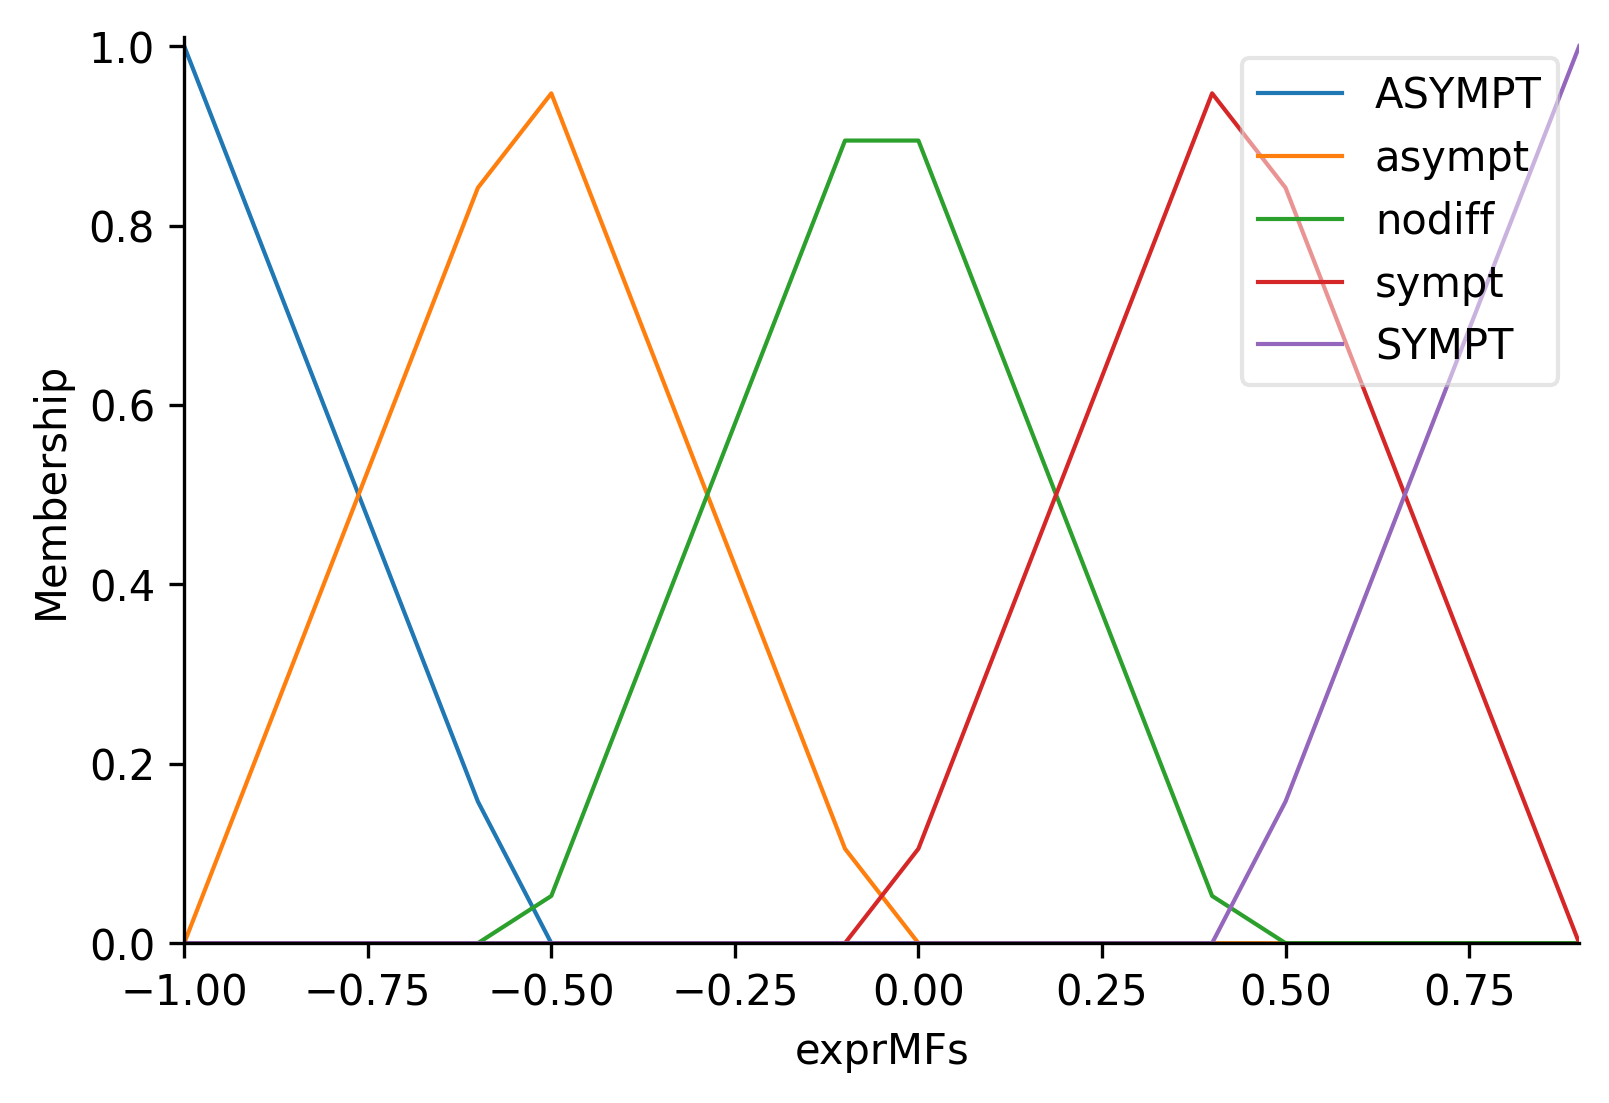

In [9]:
#explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"], meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True, shape="tri")
#explDF = FlowAnalysis.toFlowsDF(explDFRaw)

explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, stepsize=0.1, seriesOrder=["cluster.tp01","cluster.tp02","cluster.tp03"], mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"],meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True) #"cluster.thrombus"
explDFWide = FlowAnalysis.to_vwide(explDFRaw, mfFuzzy)
explDFWide

In [ ]:
#pd.set_option("display.max_rows", 200, "display.max_columns", 15)

In [10]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [12]:
fa = FlowAnalysis(explDFWide, "gene", (  ("tp01", "TP 1"),("tp02", "TP 2"),("tp03", "TP 3")), mfFuzzy) #("thrombus", "Thrombus"),

Creating FlowIDs


Figure Size (12, 12)


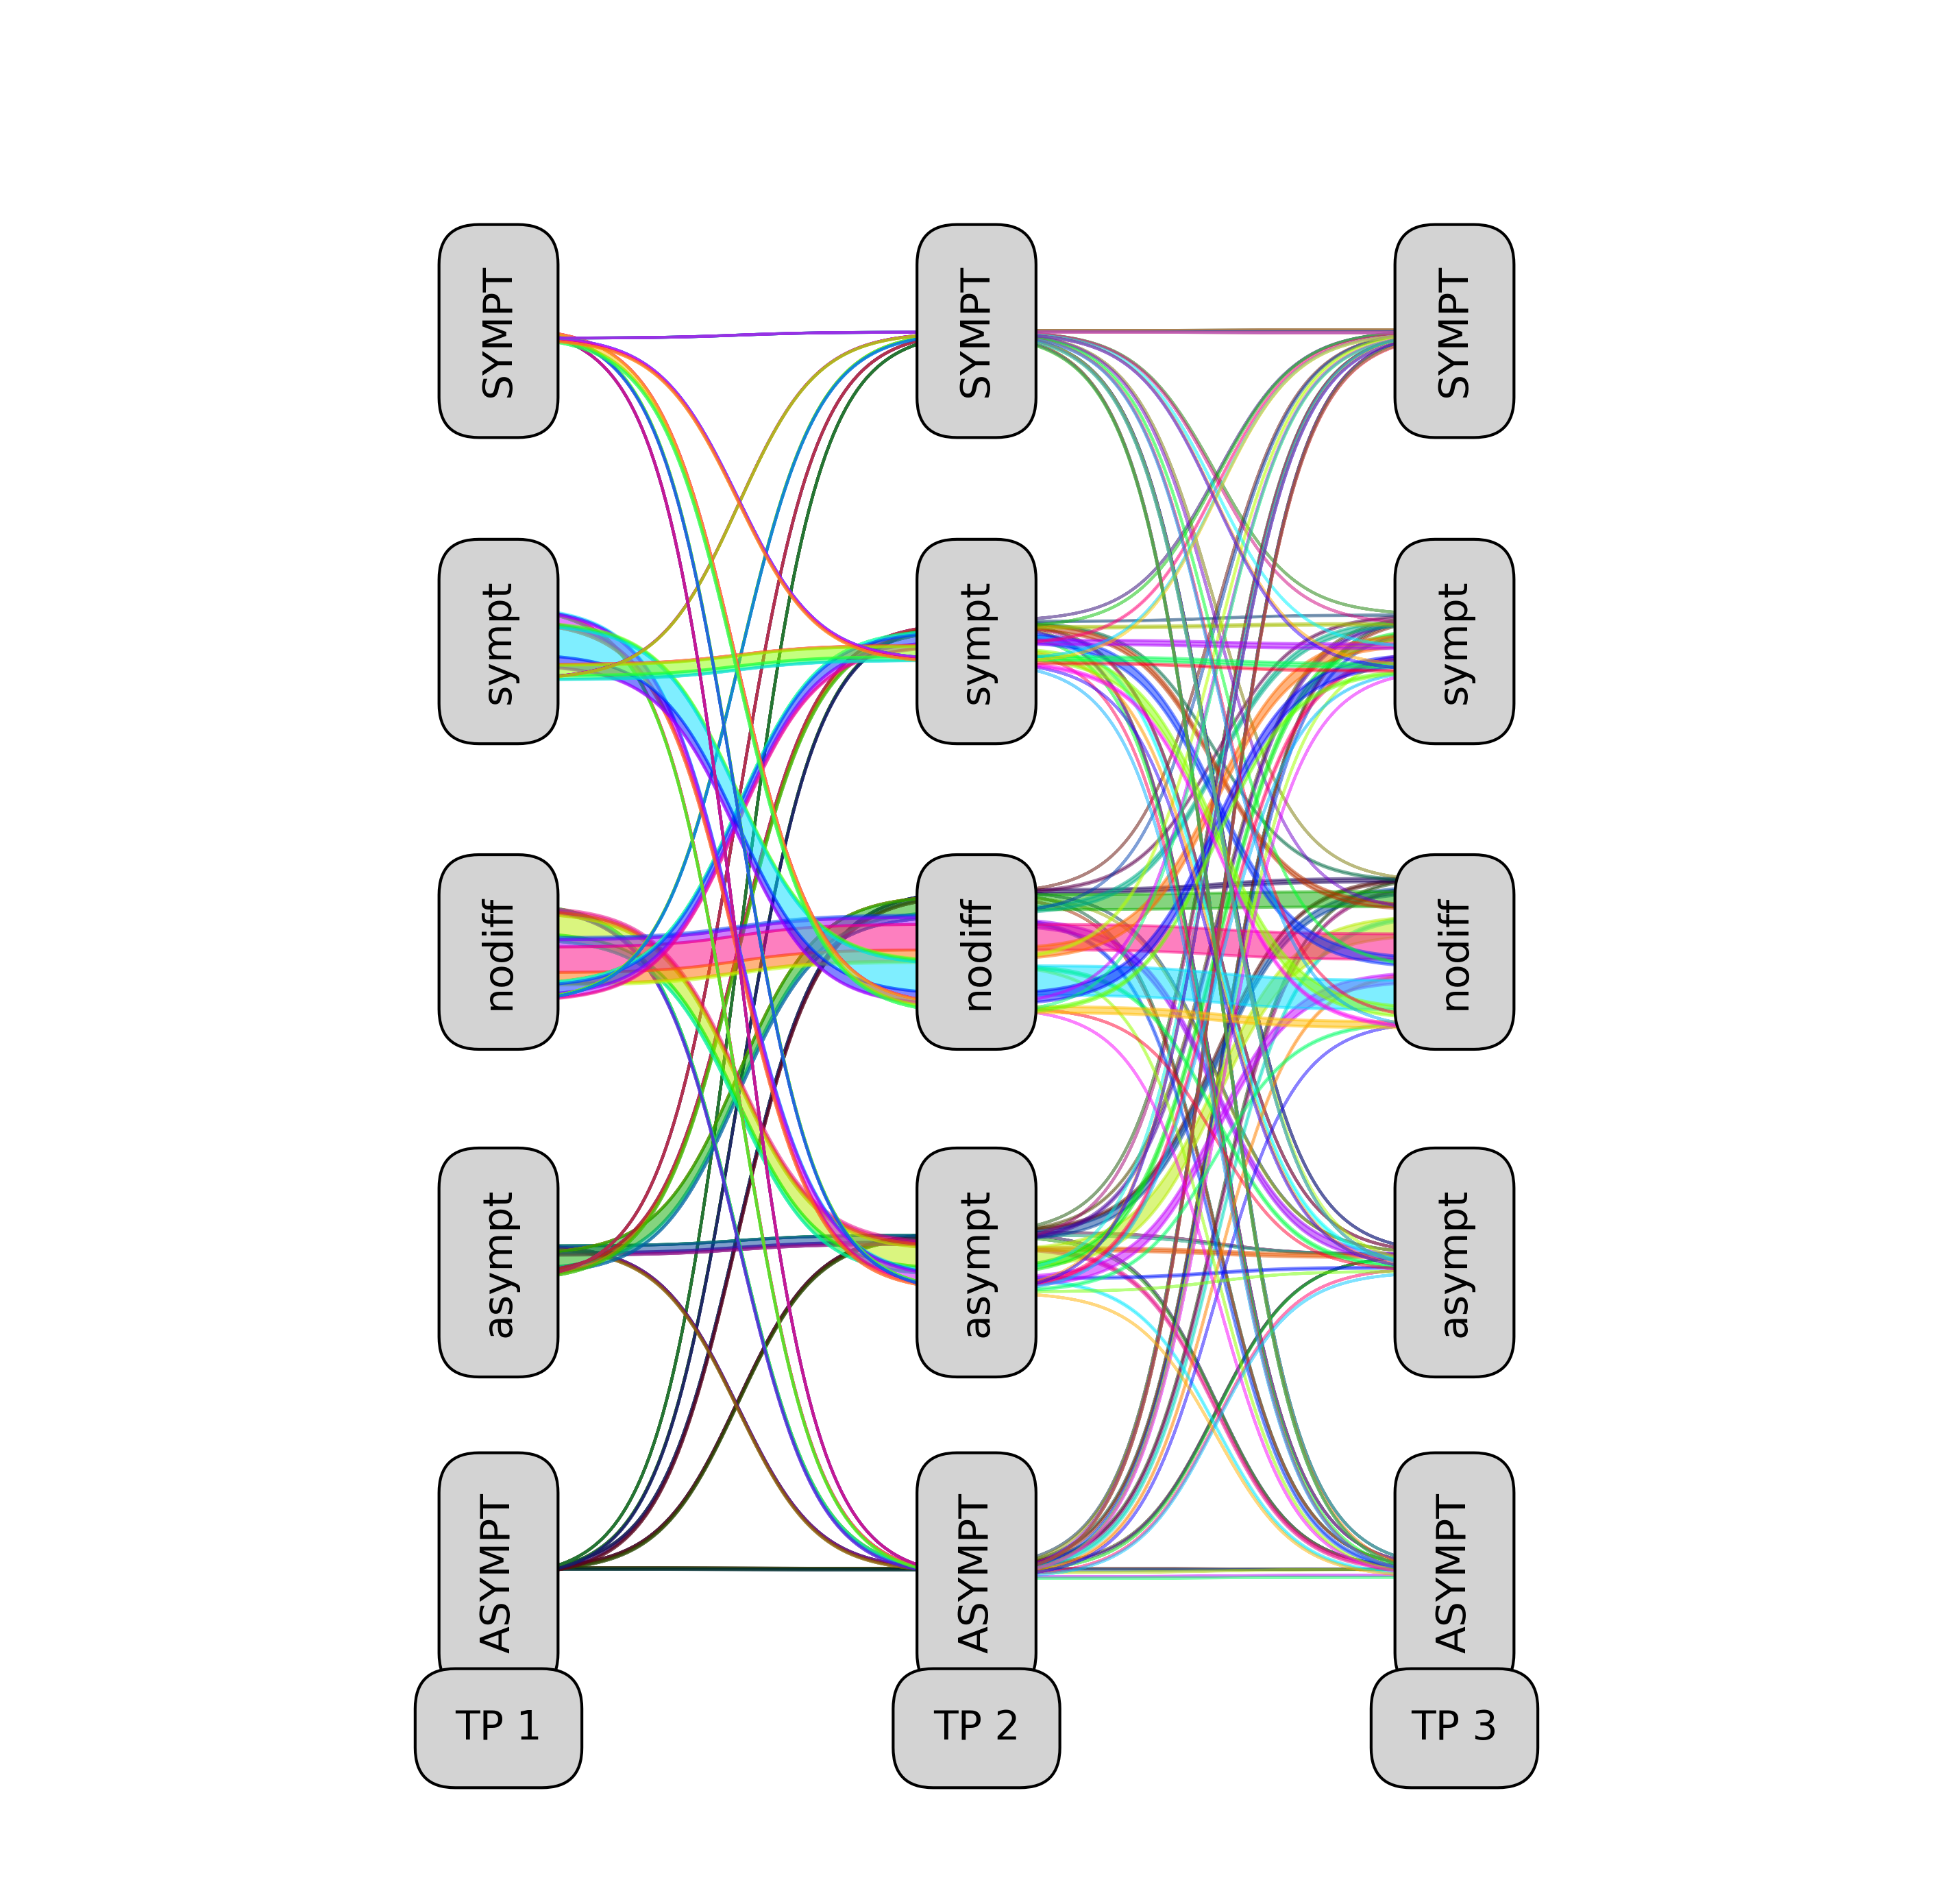

In [13]:
fa.plot_flows()

In [14]:
pwScores = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)])

Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Starting Event Loop
Event Loop Completed
Calculating p-values for groups [1, 5, 10, 50, 100, 2570]


In [16]:
pwScores

pwid                                             pwname  \
14     R-HSA-112122      ALKBH2 mediated reversal of alkylation damage   
17    R-HSA-5467333  APC truncation mutants are not K63 polyubiquit...   
30    R-HSA-9717264                     ASP-3026-resistant ALK mutants   
45    R-HSA-2978092  Abnormal conversion of 2-oxoglutarate to 2-hyd...   
159    R-HSA-211957  Aromatic amines can be N-hydroxylated or N-dea...   
...             ...                                                ...   
2538    R-HSA-72172                                      mRNA Splicing   
2539    R-HSA-72163                      mRNA Splicing - Major Pathway   
2564    R-HSA-72312                                    rRNA processing   
2566  R-HSA-8868773         rRNA processing in the nucleus and cytosol   
2575    R-HSA-72306                                    tRNA processing   

      pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
14       0.0        1        0.0       228.0                     0   
17       0.0        1        0.0       228.0                     0   
30       0.0        1        0.0       228.0                     0   
45       0.0        1        0.0       228.0                     0   
159      0.0        1        0.0       228.0                     0   
...      ...      ...        ...         ...                   ...   
2538     0.0      193        0.0       228.0                     0   
2539     0.0      182        0.0       228.0                     0   
2564     0.0      237        0.0       228.0                    17   
2566     0.0      199        0.0       228.0                     6   
2575     0.0      146        0.0       228.0                    12   

      pw_coverage  genes_coverage  mean_coverage  fgid  pw_coverage_zscore  \
14            0.0             0.0            0.0     0           -0.632228   
17            0.0             0.0            0.0     0           -0.632228   
30            0.0             0.0            0.0     0           -0.632228   
45            0.0             0.0            0.0     0           -0.632228   
159           0.0             0.0            0.0     0           -0.632228   
...           ...             ...            ...   ...                 ...   
2538          0.0             0.0            0.0   124           -0.475035   
2539          0.0             0.0            0.0   124           -0.475035   
2564          0.0             0.0            0.0   124           -0.475035   
2566          0.0             0.0            0.0   124           -0.475035   
2575          0.0             0.0            0.0   124           -0.475035   

      pval  adj_pval  
14     1.0       1.0  
17     1.0       1.0  
30     1.0       1.0  
45     1.0       1.0  
159    1.0       1.0  
...    ...       ...  
2538   1.0       1.0  
2539   1.0       1.0  
2564   1.0       1.0  
2566   1.0       1.0  
2575   1.0       1.0  

[323250 rows x 14 columns]

In [18]:
pwScores[pwScores["adj_pval"]<0.05].sort_values("adj_pval", ascending=True)

pwid                                             pwname  \
1939   R-HSA-611105                     Respiratory electron transport   
2565  R-HSA-8868766               rRNA processing in the mitochondrion   
1940   R-HSA-163200  Respiratory electron transport, ATP synthesis ...   
2371  R-HSA-1679131        Trafficking and processing of endosomal TLR   
2575    R-HSA-72306                                    tRNA processing   
...             ...                                                ...   
823    R-HSA-156842                  Eukaryotic Translation Elongation   
2441    R-HSA-75109                          Triglyceride biosynthesis   
319   R-HSA-9711123               Cellular response to chemical stress   
1159  R-HSA-6783783                           Interleukin-10 signaling   
982    R-HSA-202433           Generation of second messenger molecules   

        pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
1939  3.431377      103   4.936551       228.0                     8   
2565  4.226149       38   4.936551       228.0                    11   
1940  3.864707      127   4.936551       228.0                    11   
2371  1.367648       13  65.576831       228.0                     2   
2575  4.226149      146   4.936551       228.0                    12   
...        ...      ...        ...         ...                   ...   
823   2.173541       99  46.818320       228.0                     6   
2441  0.720607       14  65.576831       228.0                     1   
319   2.856861      199  65.576831       228.0                    10   
1159  2.414401       47  26.739952       228.0                     9   
982   2.100420       41  18.093557       228.0                     5   

      pw_coverage  genes_coverage  mean_coverage  fgid  pw_coverage_zscore  \
1939     0.033314        0.695096       0.023157    61           10.148868   
2565     0.111214        0.856093       0.095210    61            9.490200   
1940     0.030431        0.782876       0.023824    61            9.229298   
2371     0.105204        0.020856       0.002194    87            8.948874   
2575     0.028946        0.856093       0.024781    61            8.755882   
...           ...             ...            ...   ...                 ...   
823      0.021955        0.046425       0.001019    62            4.130521   
2441     0.051472        0.010989       0.000566    87            4.109804   
319      0.014356        0.043565       0.000625    87            4.103103   
1159     0.051370        0.090292       0.004638    57            4.100646   
982      0.051230        0.116087       0.005947    37            4.087994   

              pval      adj_pval  
1939  1.676144e-24  5.418137e-19  
2565  1.152955e-21  1.863464e-16  
1940  1.362060e-20  1.467619e-15  
2371  1.795626e-19  1.451090e-14  
2575  1.012566e-18  6.546236e-14  
...            ...           ...  
823   1.809707e-05  3.848604e-02  
2441  1.979973e-05  4.183178e-02  
319   2.038225e-05  4.278287e-02  
1159  2.059990e-05  4.296075e-02  
982   2.175595e-05  4.508085e-02  

[156 rows x 14 columns]

In [19]:
pwScores[pwScores.adj_pval < 0.05].sort_values("adj_pval")

pwid                                             pwname  \
1939   R-HSA-611105                     Respiratory electron transport   
2565  R-HSA-8868766               rRNA processing in the mitochondrion   
1940   R-HSA-163200  Respiratory electron transport, ATP synthesis ...   
2371  R-HSA-1679131        Trafficking and processing of endosomal TLR   
2575    R-HSA-72306                                    tRNA processing   
...             ...                                                ...   
823    R-HSA-156842                  Eukaryotic Translation Elongation   
2441    R-HSA-75109                          Triglyceride biosynthesis   
319   R-HSA-9711123               Cellular response to chemical stress   
1159  R-HSA-6783783                           Interleukin-10 signaling   
982    R-HSA-202433           Generation of second messenger molecules   

        pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
1939  3.431377      103   4.936551       228.0                     8   
2565  4.226149       38   4.936551       228.0                    11   
1940  3.864707      127   4.936551       228.0                    11   
2371  1.367648       13  65.576831       228.0                     2   
2575  4.226149      146   4.936551       228.0                    12   
...        ...      ...        ...         ...                   ...   
823   2.173541       99  46.818320       228.0                     6   
2441  0.720607       14  65.576831       228.0                     1   
319   2.856861      199  65.576831       228.0                    10   
1159  2.414401       47  26.739952       228.0                     9   
982   2.100420       41  18.093557       228.0                     5   

      pw_coverage  genes_coverage  mean_coverage  fgid  pw_coverage_zscore  \
1939     0.033314        0.695096       0.023157    61           10.148868   
2565     0.111214        0.856093       0.095210    61            9.490200   
1940     0.030431        0.782876       0.023824    61            9.229298   
2371     0.105204        0.020856       0.002194    87            8.948874   
2575     0.028946        0.856093       0.024781    61            8.755882   
...           ...             ...            ...   ...                 ...   
823      0.021955        0.046425       0.001019    62            4.130521   
2441     0.051472        0.010989       0.000566    87            4.109804   
319      0.014356        0.043565       0.000625    87            4.103103   
1159     0.051370        0.090292       0.004638    57            4.100646   
982      0.051230        0.116087       0.005947    37            4.087994   

              pval      adj_pval  
1939  1.676144e-24  5.418137e-19  
2565  1.152955e-21  1.863464e-16  
1940  1.362060e-20  1.467619e-15  
2371  1.795626e-19  1.451090e-14  
2575  1.012566e-18  6.546236e-14  
...            ...           ...  
823   1.809707e-05  3.848604e-02  
2441  1.979973e-05  4.183178e-02  
319   2.038225e-05  4.278287e-02  
1159  2.059990e-05  4.296075e-02  
982   2.175595e-05  4.508085e-02  

[156 rows x 14 columns]

In [20]:
relFlowsAsympt = fa.flow_finder(["<=", "<="], maxLevels=["asympt", None, None], verbose=True)
print(relFlowsAsympt)

0 [('tp01', 'ASYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'ASYMPT')]
1 [('tp01', 'ASYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'asympt')]
2 [('tp01', 'ASYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'nodiff')]
3 [('tp01', 'ASYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'sympt')]
4 [('tp01', 'ASYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'SYMPT')]
6 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'asympt')]
7 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'nodiff')]
8 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'sympt')]
9 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'SYMPT')]
12 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
13 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'sympt')]
14 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'SYMPT')]
18 [('tp01', 'ASYMPT'), ('tp02', 'sympt'), ('tp03', 'sympt')]
19 [('tp01', 'ASYMPT'), ('tp02', 'sympt'), ('tp03', 'SYMPT')]
24 [('tp01', 'ASYMPT'), ('tp02', 'SYMPT'), ('tp03', 'SYMPT')]
31 [('tp01', 'asympt'), ('tp02', 'asympt'), ('tp03', 'asympt'

In [21]:
relFlowsSympt = fa.flow_finder([">=", ">="], minLevels=["sympt", None, None], verbose=True)
print(relFlowsSympt)

75 [('tp01', 'sympt'), ('tp02', 'ASYMPT'), ('tp03', 'ASYMPT')]
80 [('tp01', 'sympt'), ('tp02', 'asympt'), ('tp03', 'ASYMPT')]
81 [('tp01', 'sympt'), ('tp02', 'asympt'), ('tp03', 'asympt')]
85 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'ASYMPT')]
86 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'asympt')]
87 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
90 [('tp01', 'sympt'), ('tp02', 'sympt'), ('tp03', 'ASYMPT')]
91 [('tp01', 'sympt'), ('tp02', 'sympt'), ('tp03', 'asympt')]
92 [('tp01', 'sympt'), ('tp02', 'sympt'), ('tp03', 'nodiff')]
93 [('tp01', 'sympt'), ('tp02', 'sympt'), ('tp03', 'sympt')]
100 [('tp01', 'SYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'ASYMPT')]
105 [('tp01', 'SYMPT'), ('tp02', 'asympt'), ('tp03', 'ASYMPT')]
106 [('tp01', 'SYMPT'), ('tp02', 'asympt'), ('tp03', 'asympt')]
110 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'ASYMPT')]
111 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'asympt')]
112 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'n

Figure Size (8, 6)


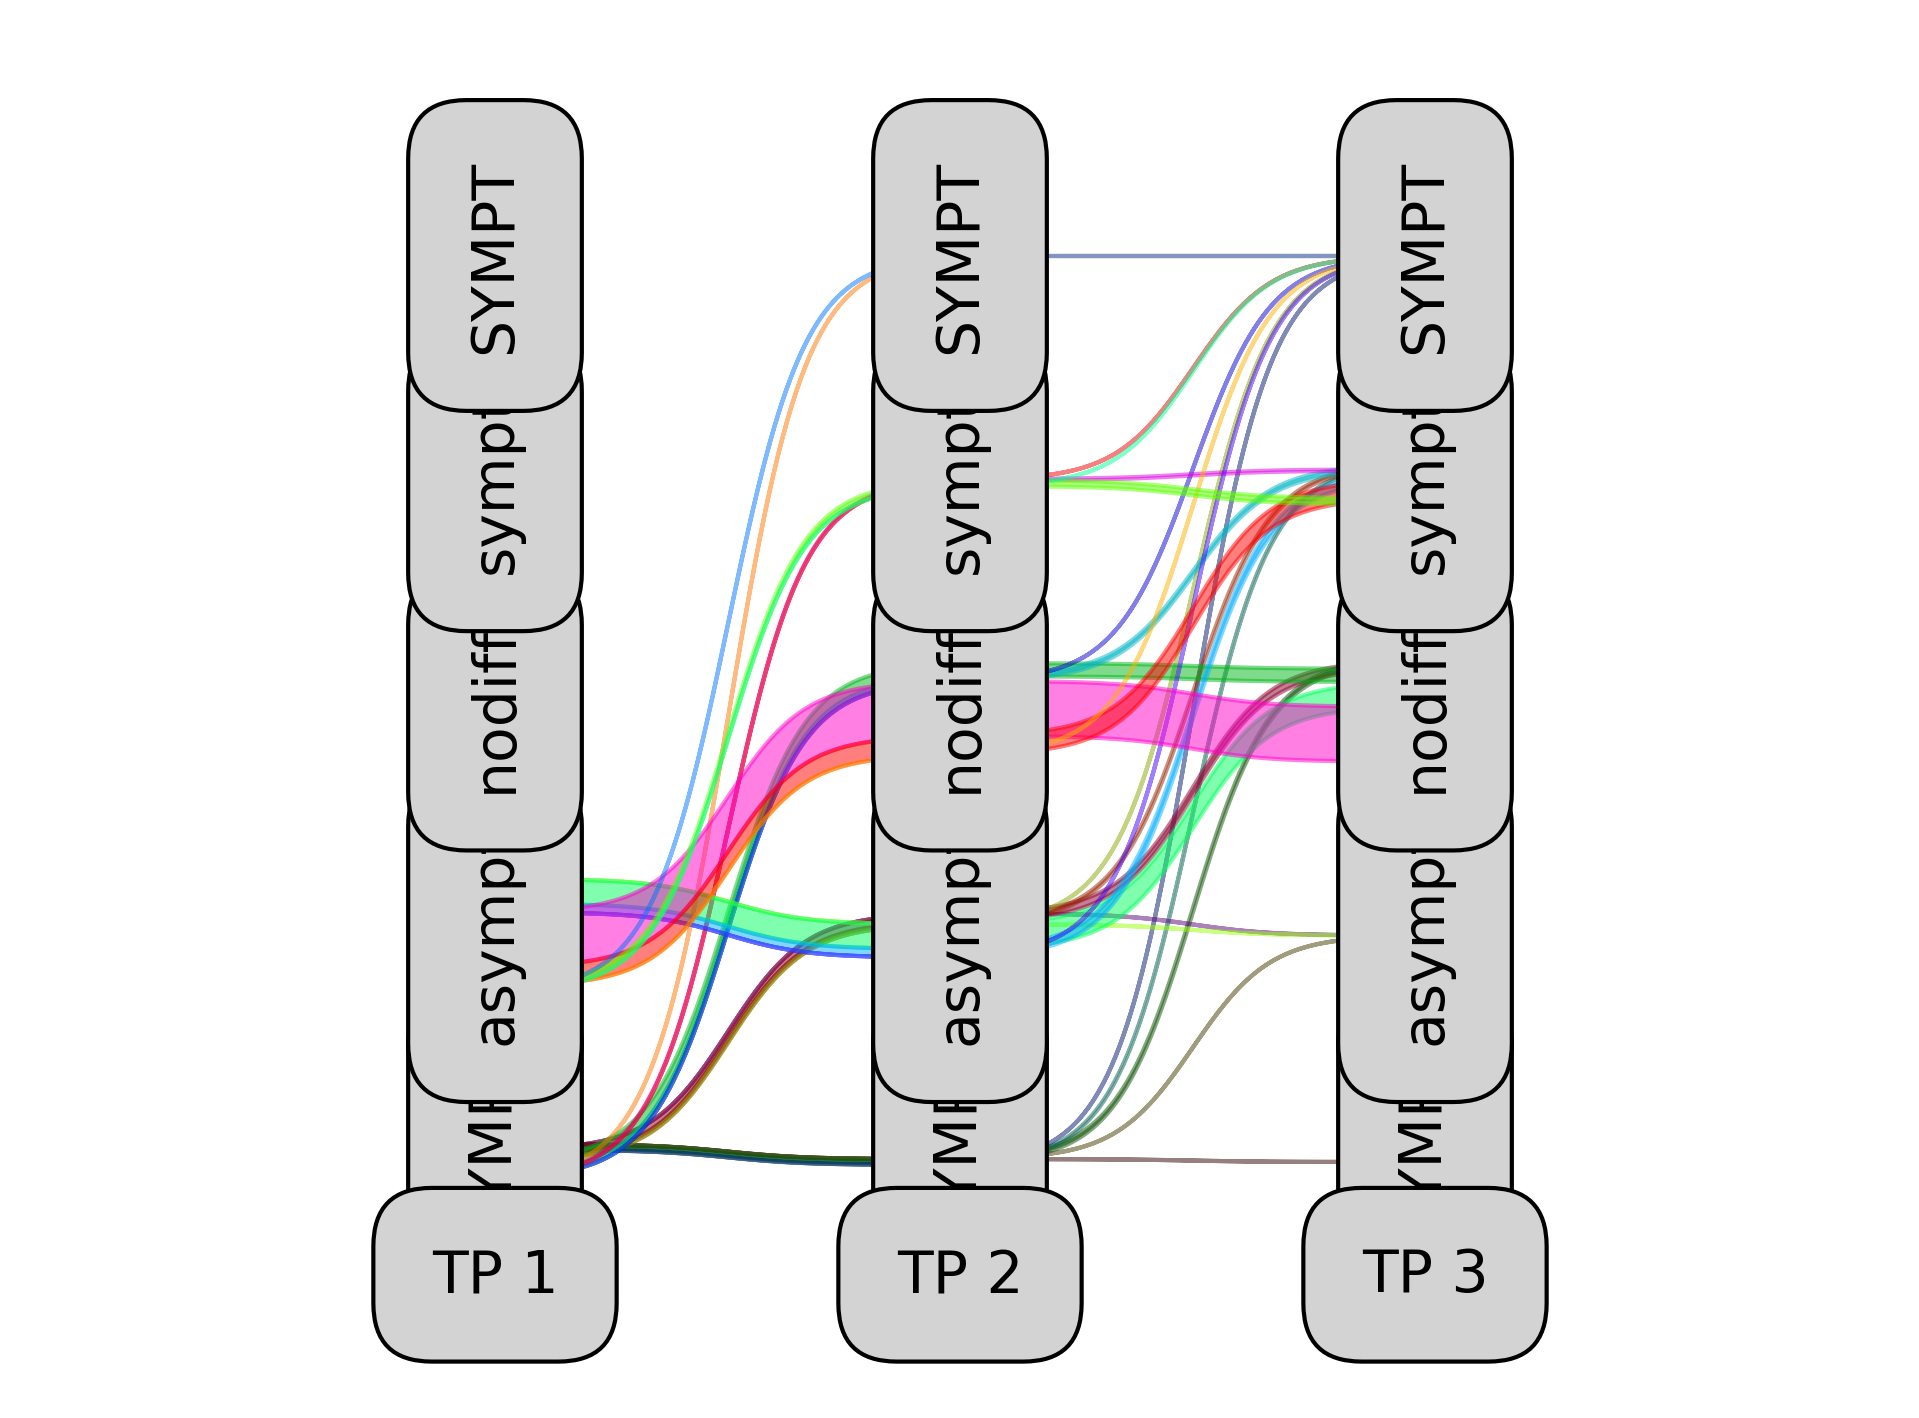

In [22]:
fa.plot_flows(use_flows=relFlowsAsympt, figsize=(8,6))

Figure Size (12, 12)


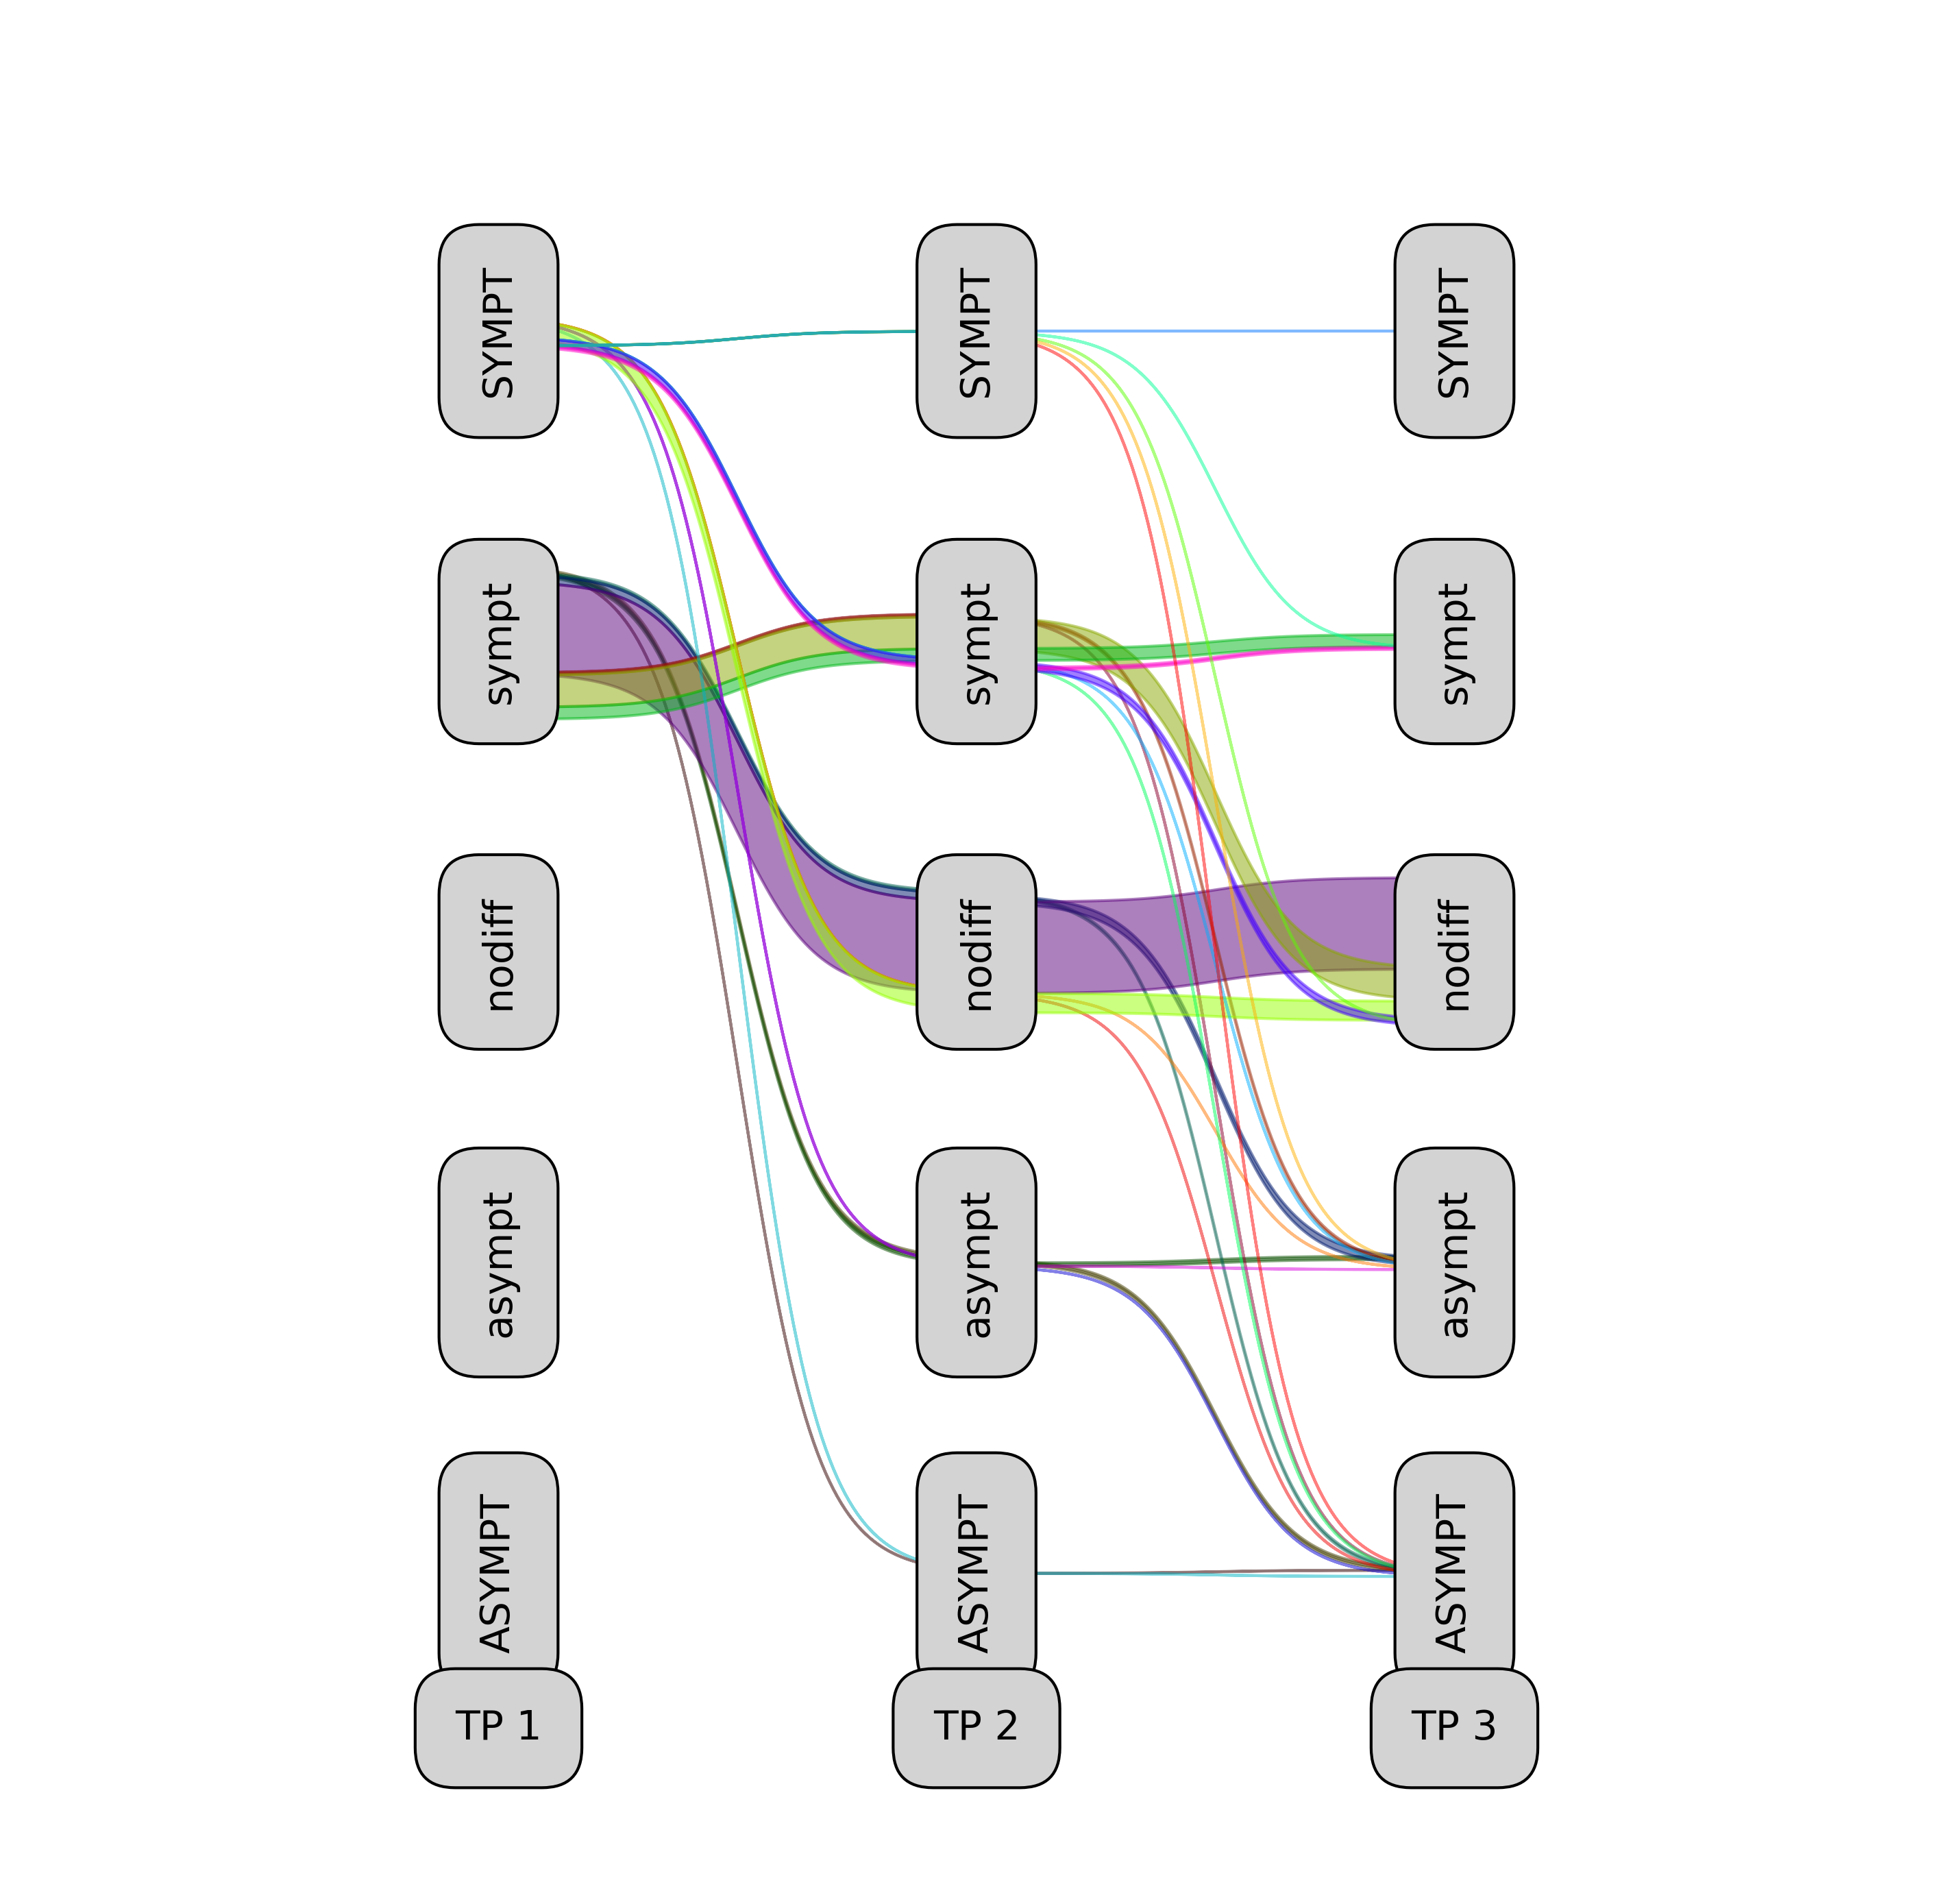

In [23]:
fa.plot_flows(use_flows=relFlowsSympt)

In [24]:
pwScoresRelAsmypt = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresRelSmypt = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Starting Event Loop
Event Loop Completed
Calculating p-values for groups [1, 5, 10, 50, 100, 2570]
Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Starting Event Loop
Event Loop Completed
Calculating p-values for groups [1, 5, 10, 50, 100, 2570]


In [26]:
pwScoresAsymptGrp = fa.analyse_pathways_grouped(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresSymptGrp = fa.analyse_pathways_grouped(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Calculating p-values for groups [2, 10, 50, 100, 2570]
Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Calculating p-values for groups [2, 10, 50, 100, 2570]


In [28]:
selPWsAsymptGrp = pwScoresAsymptGrp[(pwScoresAsymptGrp["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsAsymptGrp)
fa.plotORAresult(selPWsAsymptGrp, "Asymptomatic Grouped", numResults=10, figsize=(10,7))

Empty DataFrame
Columns: [pwid, pwname, pwFlow, pwGenes, allPwFlow, allPwGenes, pw_gene_intersection, pw_coverage, genes_coverage, mean_coverage, pw_coverage_zscore, pval, adj_pval]
Index: []

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(0, 14)


pwid                                             pwname  \
2390  R-HSA-2173793  Transcriptional activity of SMAD2/SMAD3:SMAD4 ...   
2371  R-HSA-1679131        Trafficking and processing of endosomal TLR   

        pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
2390  3.172660       51  78.627507       228.0                     5   
2371  1.638994       13  78.627507       228.0                     2   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
2390     0.062209        0.040351       0.002510            5.059507   
2371     0.126076        0.020845       0.002628            4.103401   

              pval  adj_pval  
2390  2.101713e-07  0.000544  
2371  2.035601e-05  0.026320

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(2, 14)


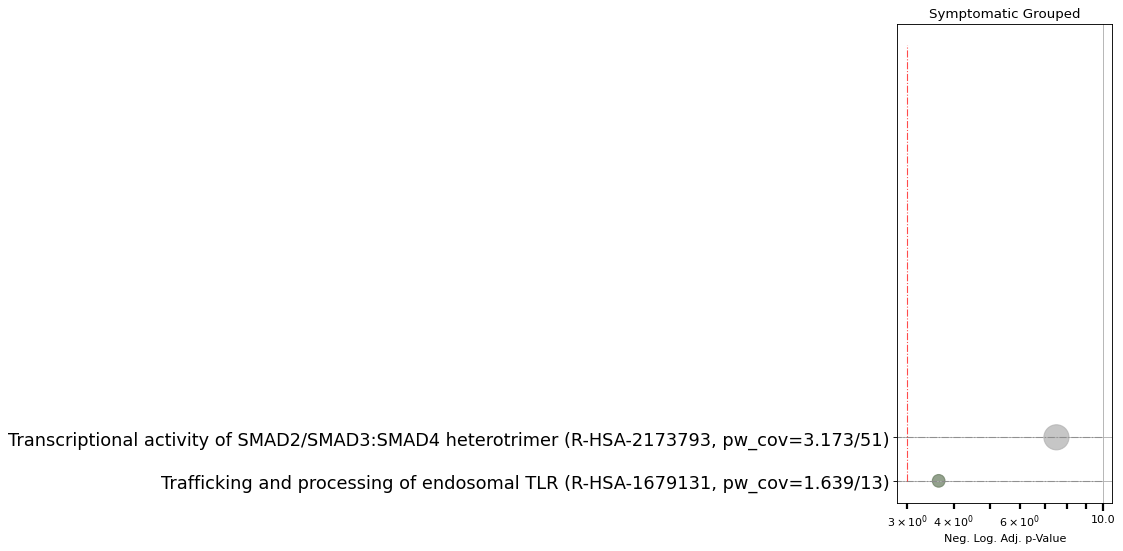

In [30]:
selPWsSymptGrp = pwScoresSymptGrp[(pwScoresSymptGrp["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsSymptGrp)
fa.plotORAresult(selPWsSymptGrp, "Symptomatic Grouped", numResults=10, figsize=(10,7))

In [31]:
selPWsAsympt = pwScoresRelAsmypt[(pwScoresRelAsmypt["adj_pval"] < 0.05)].sort_values("genes_coverage", ascending=True).head(10)
fa.plotORAresult(selPWsAsympt, "Asymptomatic", numResults=selPWsAsympt.shape[0], figsize=(10,7))

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'fgid', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(0, 15)


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'fgid', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(27, 15)


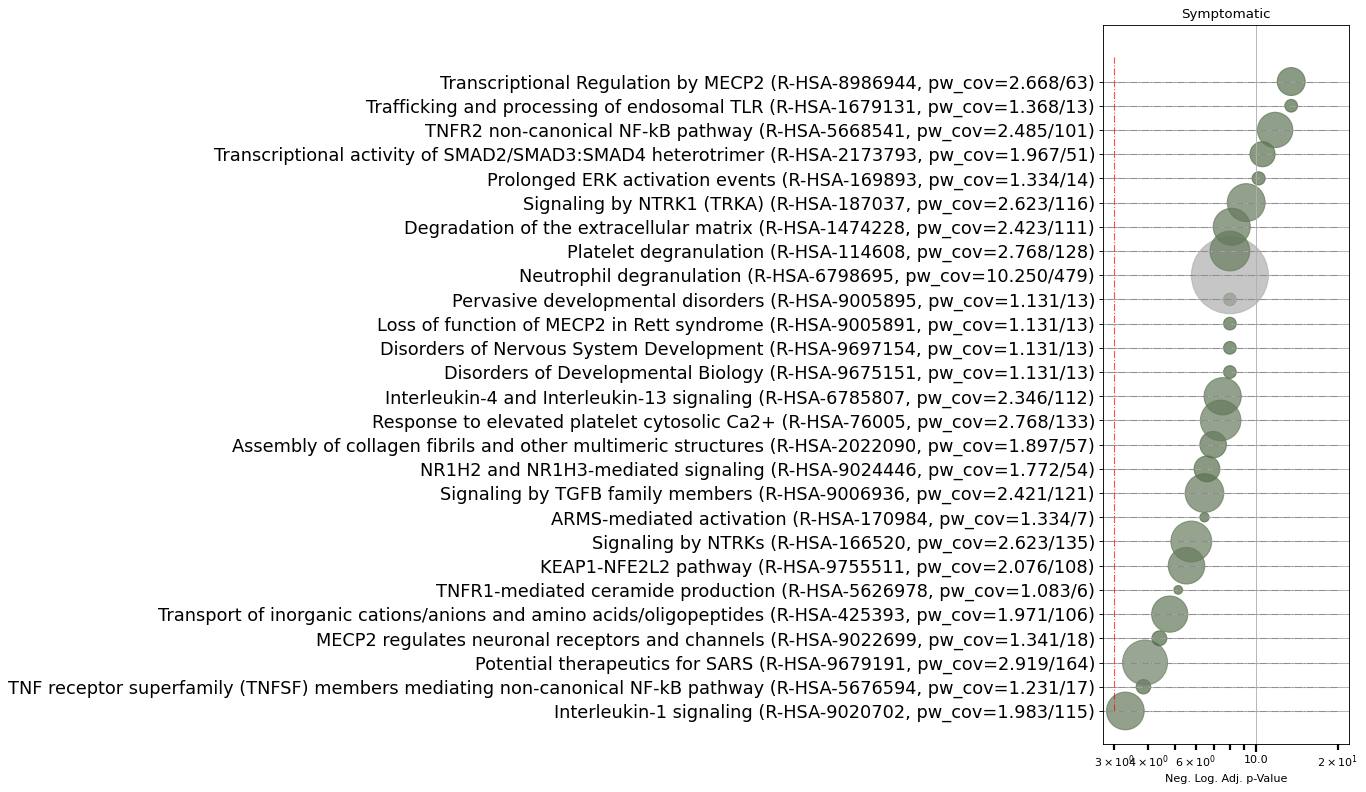

In [36]:
selPWsSympt = pwScoresRelSmypt[(pwScoresRelSmypt["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(50)
fa.plotORAresult(selPWsSympt, "Symptomatic", numResults=selPWsSympt.shape[0], figsize=(12,10))

Figure Size (12, 12)


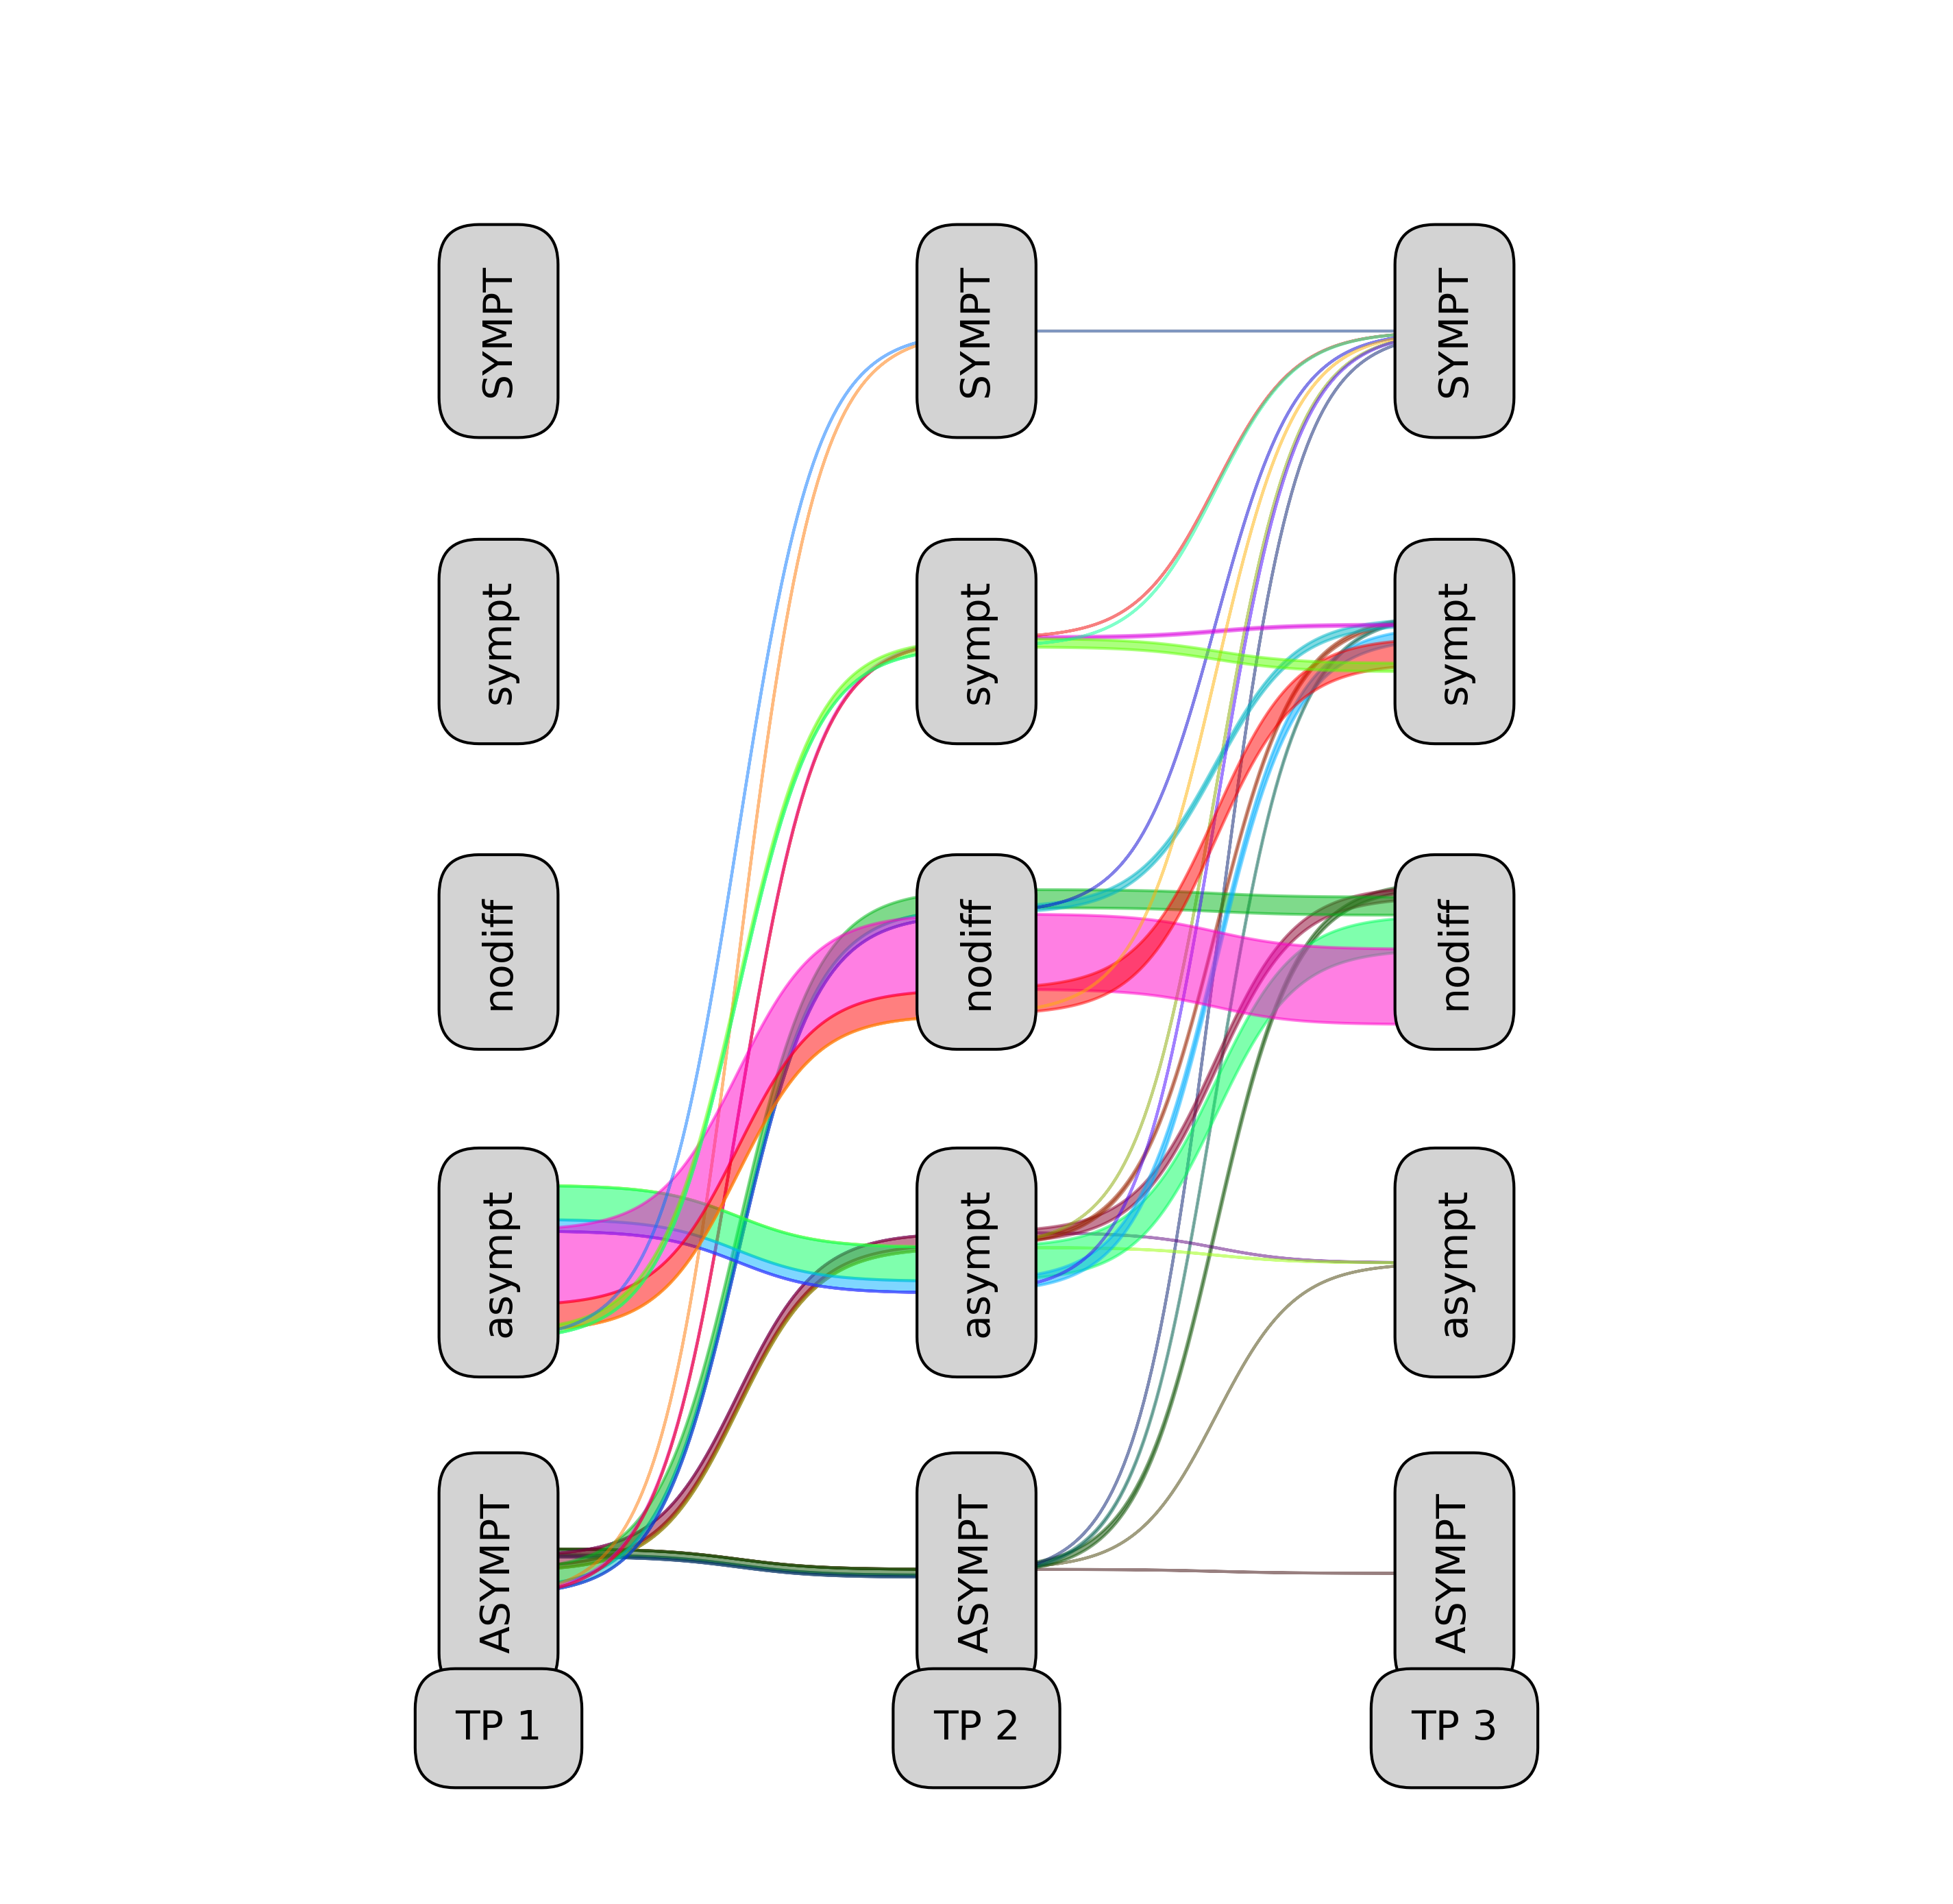

In [37]:
fa.plot_flows(use_flows=relFlowsAsympt)


Figure Size (12, 12)


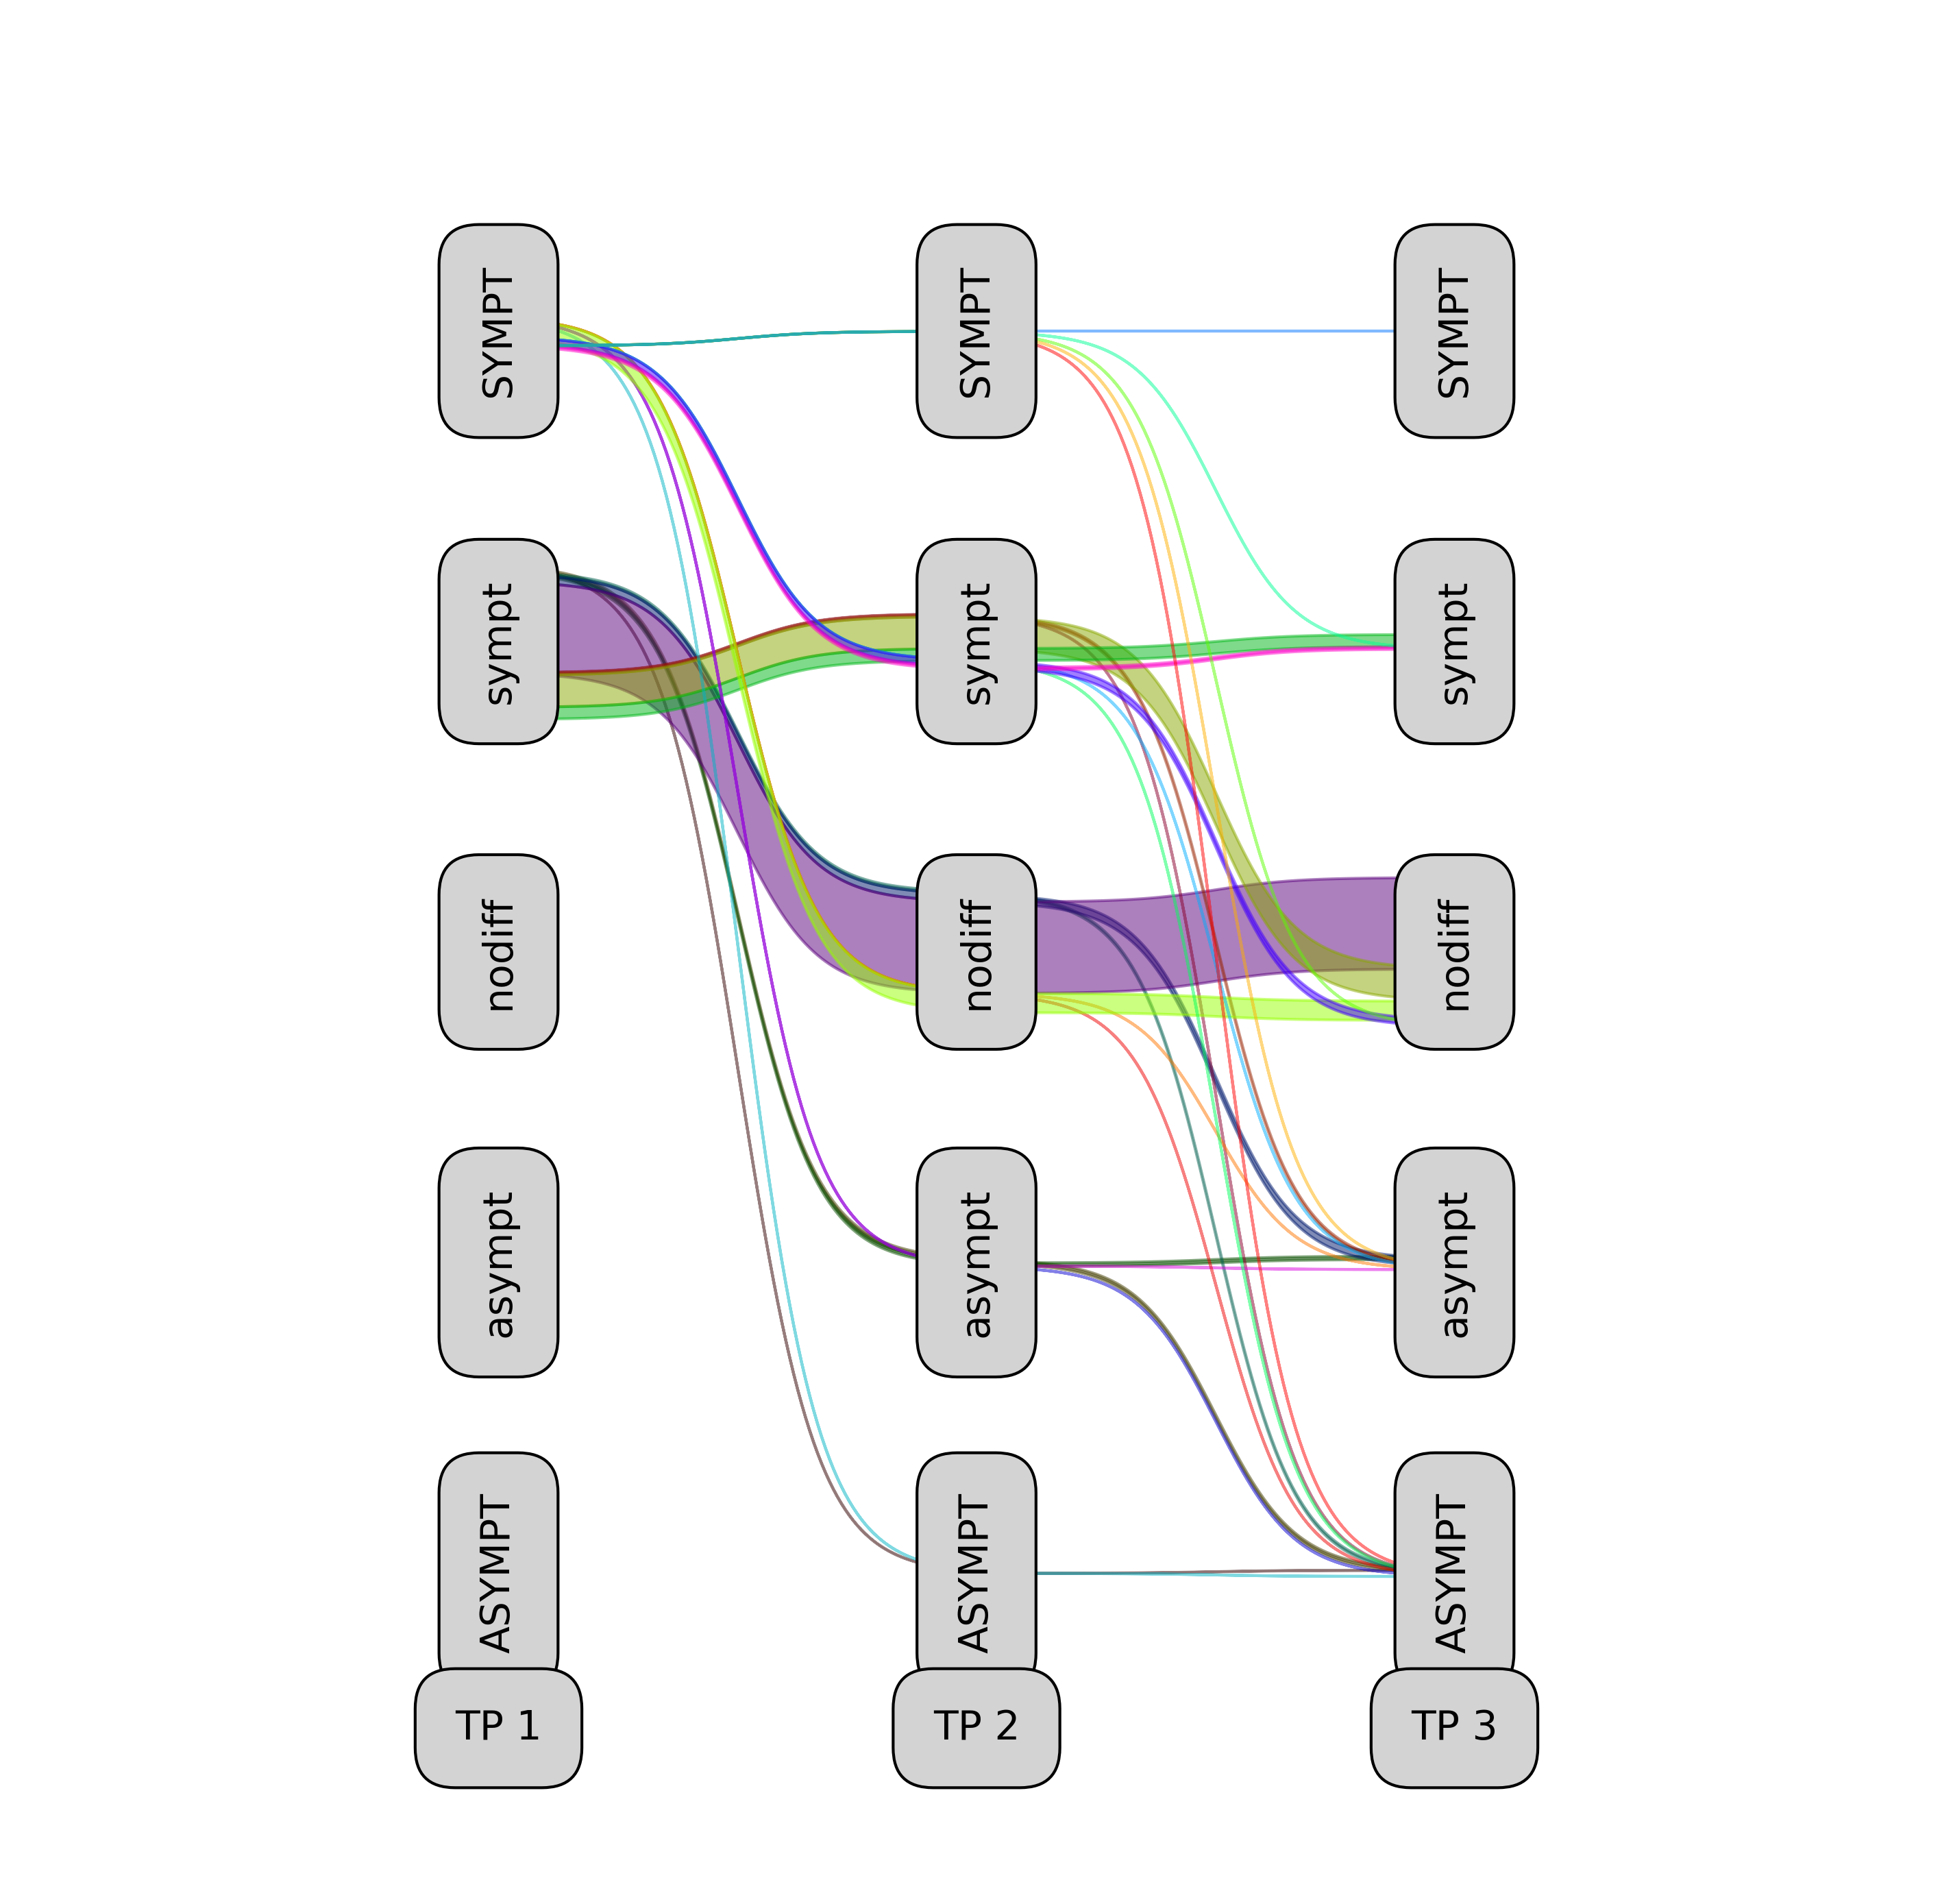

In [38]:
fa.plot_flows(use_flows=relFlowsSympt)

Figure Size (12, 12)


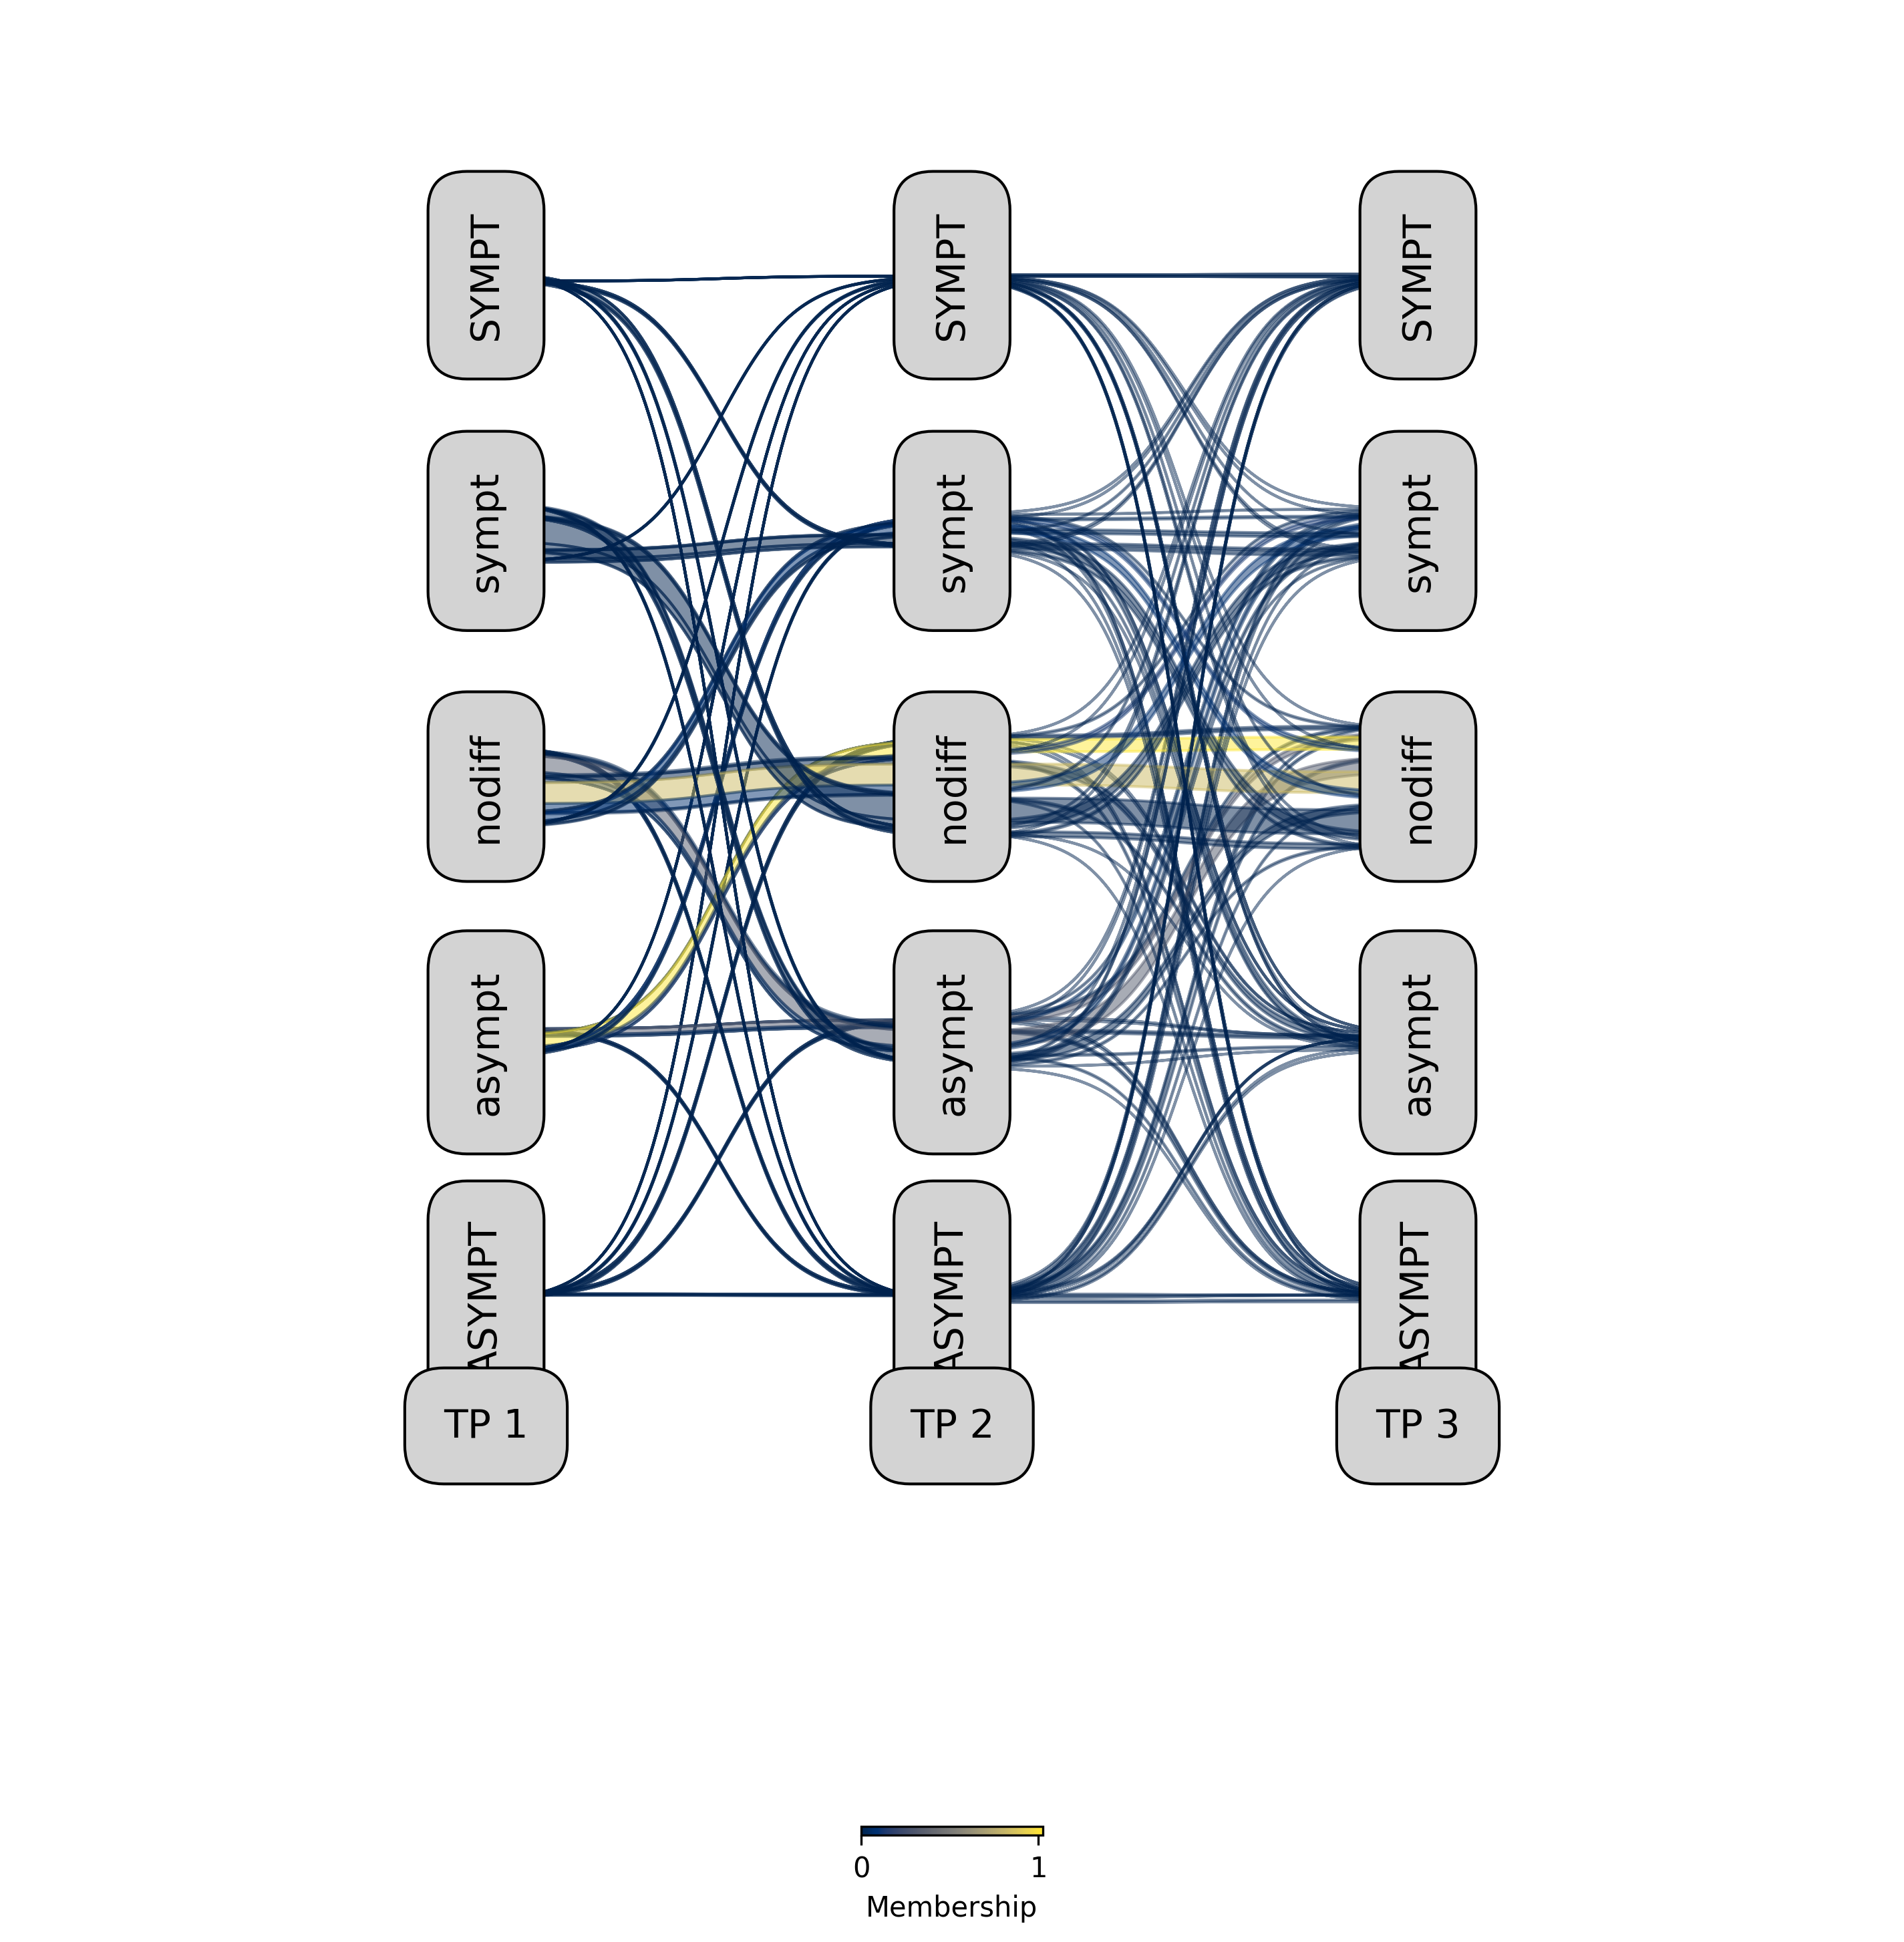

In [39]:
fa.visualize_genes(genes=isgListShort)

Figure Size (12, 12)


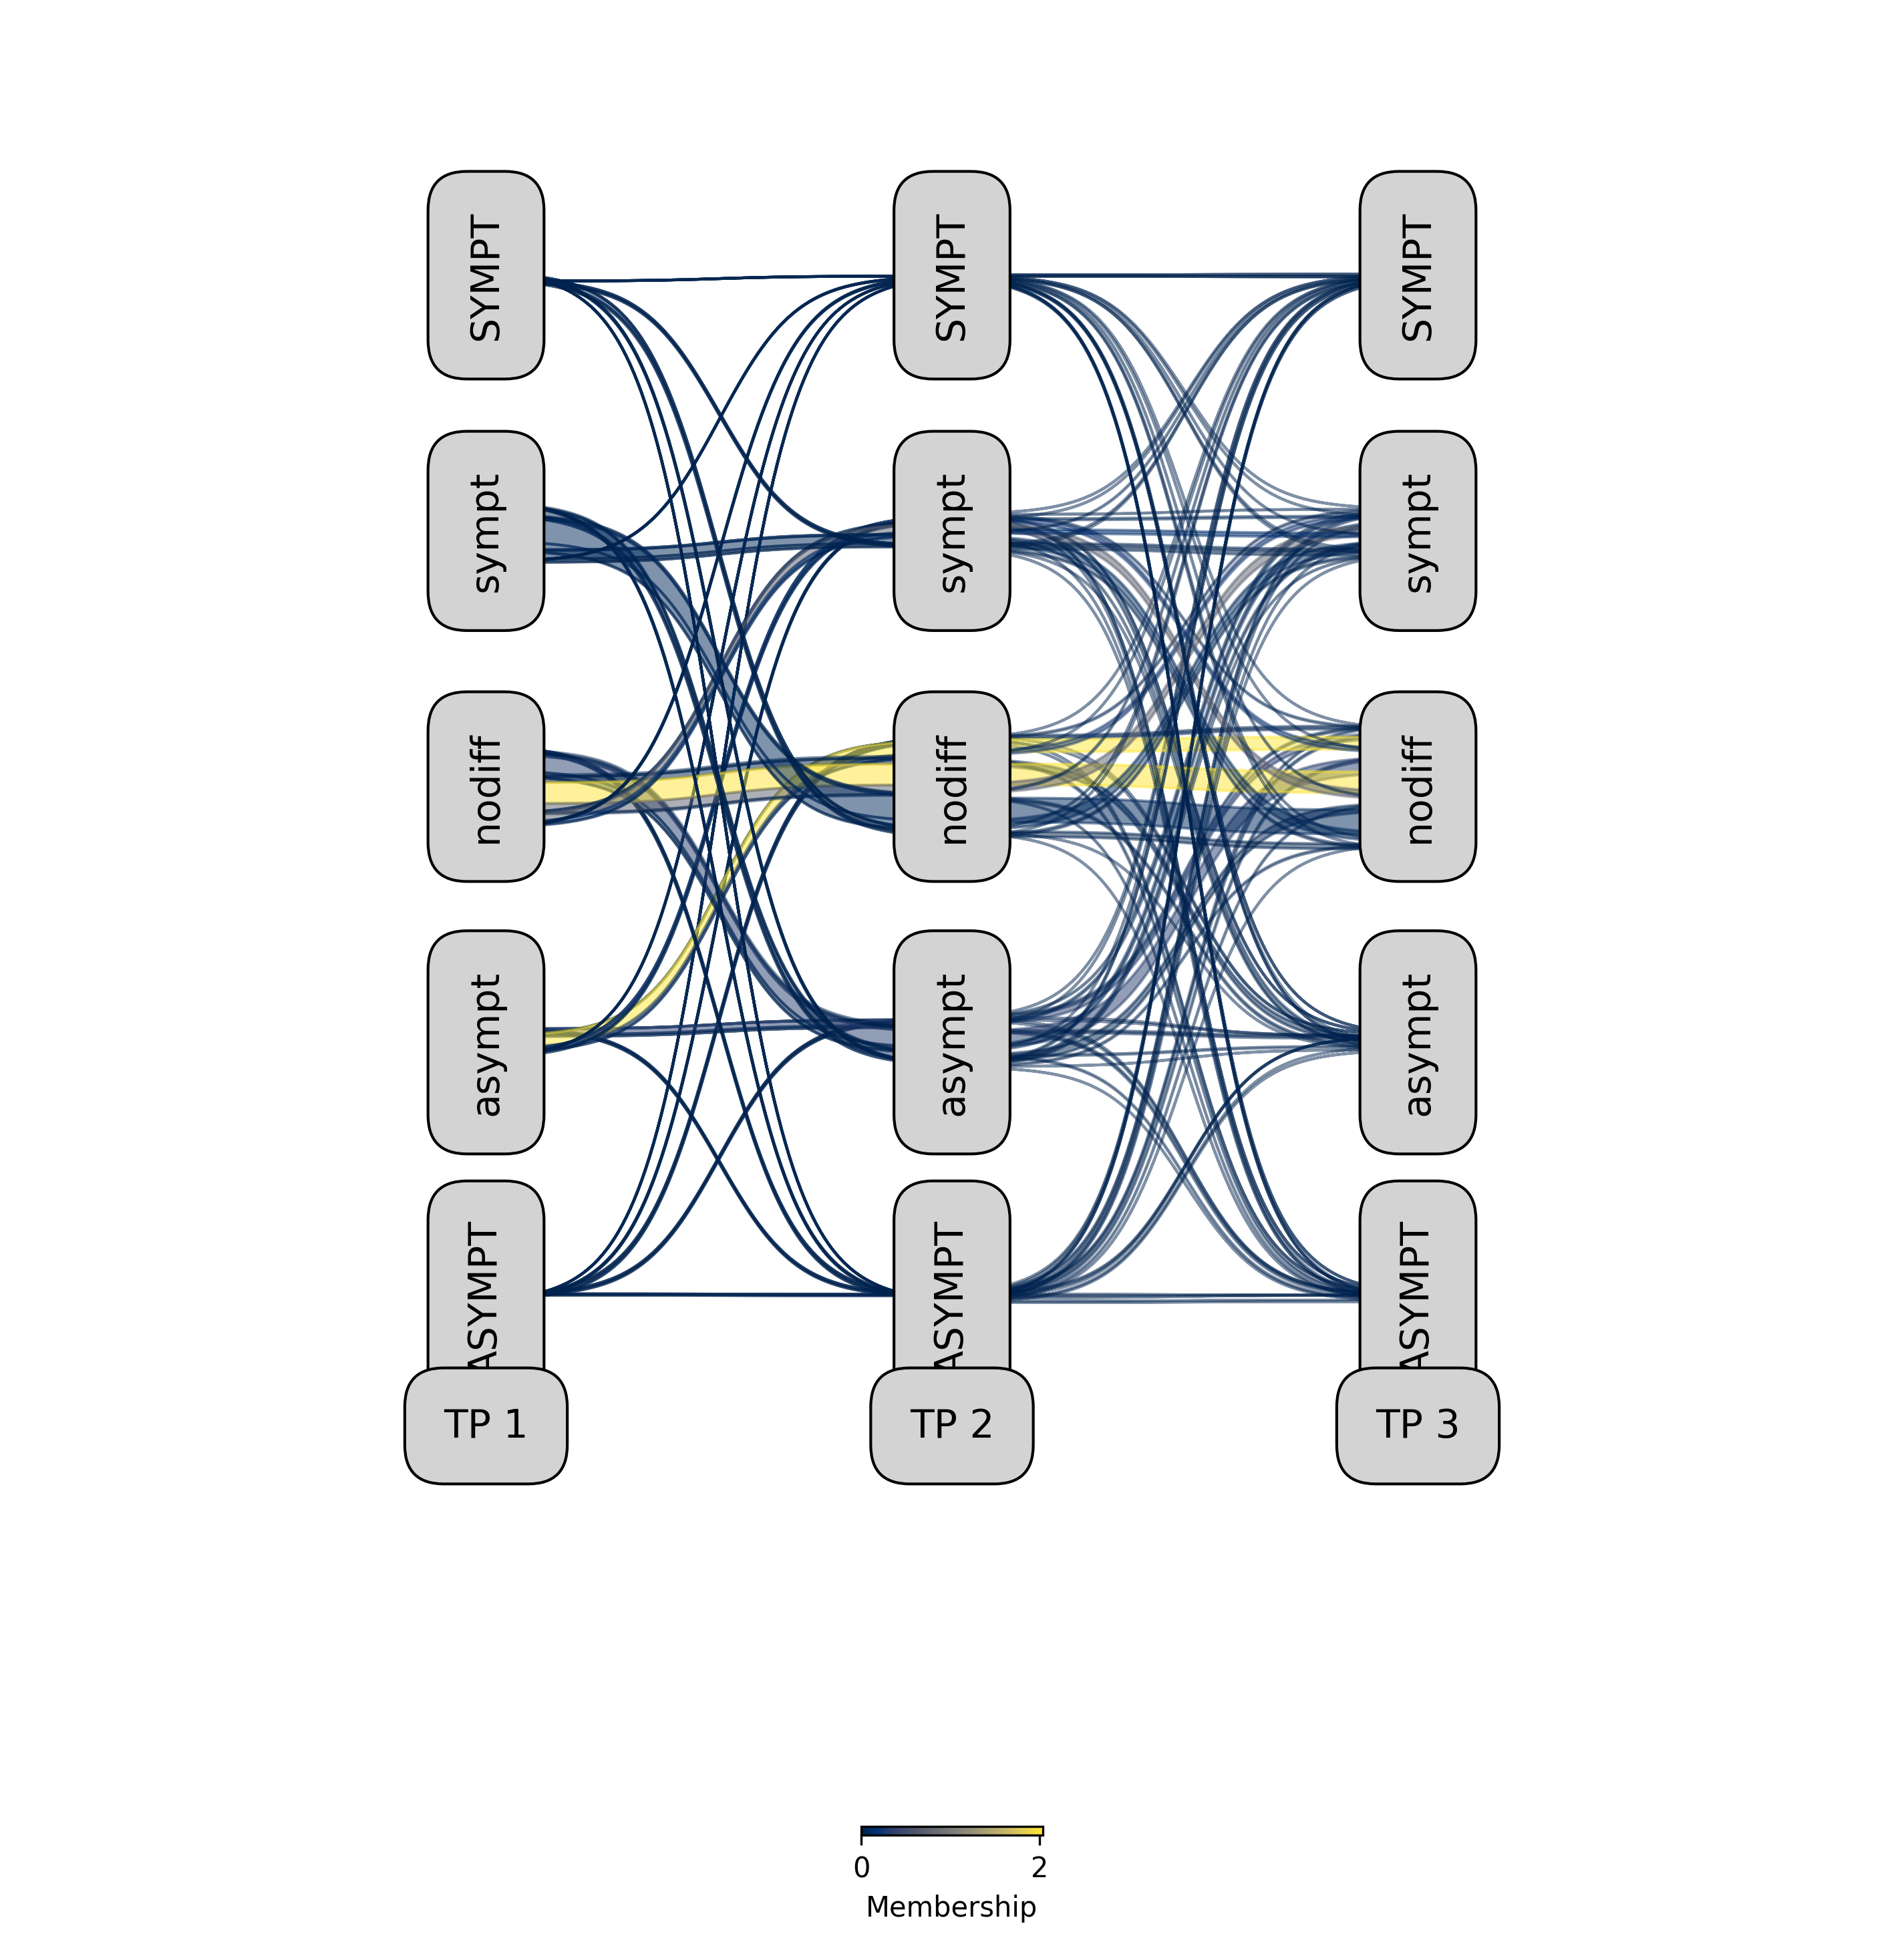

In [40]:
fa.visualize_genes(genes=isgListLong)